In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from grid_search import *
from costs import *
%load_ext autoreload
%autoreload 2

# Least squares and linear basis functions models
## Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weight
   
    wopt=np.linalg.inv(tx.T.dot(tx)).dot(tx.T).dot(y)
    mse=compute_loss(y,tx,wopt)
    return mse,wopt
    # ***************************************************

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [7]:
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    
    n=y.shape[0]
    y=np.reshape(y,(n,1))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    least_error, wopt =least_squares(y,tx)
    # Generate the grid of parameters to be swept
    grid_w0, grid_w1 = generate_w(num_intervals=100)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    
    
    return wopt,[w0_star, w1_star],[least_error, loss_star]
    # ***************************************************
    #raise NotImplementedError

test_your_least_squares()

(array([[ 73.293922  ],
        [ 13.47971243]]),
 [72.72727272727272, 13.636363636363626],
 [array([[ 15.38588787]]), 15.558703368609528])

## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [4]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))


shape of x (50,)
shape of y (50,)


In [5]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    j=degree
    print('j')
    N=len(x)
    poly=np.zeros((N,j+1))
    for i in range(j+1):
        poly[:,i]=np.power(x,i)
    return poly
    # ***************************************************
    raise NotImplementedError

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.2585827766773747
Processing 3th experiment, degree=7, rmse=0.2496587036090758
Processing 4th experiment, degree=12, rmse=1.3106193798114107


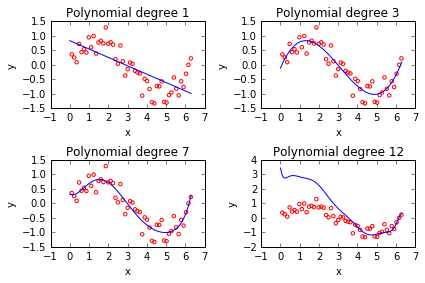

In [6]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        polx=build_poly(x, degree)
        #print(polx)
        # ***************************************************
        #raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate rmse: TODO
        loss,weight=least_squares(y,polx)
        rmse=np.power(2*loss,1/2)
        # ***************************************************
        #raise NotImplementedError

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [63]:
import random
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    N=len(y)
 
    Nt=int(np.floor(ratio*N));
    Ntindex=np.random.randint(0,N-1,Nt)
    
    Yt=y[Ntindex]
    Yv=np.delete(y,[Ntindex])
    
   
    Xt=x[Ntindex]
    Xv=np.delete(x,[Ntindex])
    
    St=Xt,Yt
    Sv=Xv,Yv
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    
    # ***************************************************
    return St, Sv


Then, test your `split_data` function below.

In [64]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    St,Sv=split_data(x,y,ratio)
    # raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    xt,yt=St
    xv,yv=Sv
    
    xtpoly=build_poly(xt,degree)
    xvpoly=build_poly(xv,degree)
    
    # ***************************************************
   # raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    
    
    mse_t,wopt_t=least_squares(yt,xtpoly)
    mse_v=compute_loss(yv,xvpoly,wopt_t)

    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    rmse_tr=np.power(mse_t*2,1/2)
    rmse_te=np.power(mse_v*2,1/2)
    
    # ***************************************************
   # raise NotImplementedError
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 1
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.448, Testing RMSE=0.518
proportion=0.9, degree=3, Training RMSE=0.242, Testing RMSE=0.312
proportion=0.9, degree=7, Training RMSE=0.220, Testing RMSE=0.314
proportion=0.9, degree=12, Training RMSE=0.316, Testing RMSE=0.379
proportion=0.5, degree=1, Training RMSE=0.456, Testing RMSE=0.466
proportion=0.5, degree=3, Training RMSE=0.234, Testing RMSE=0.287
proportion=0.5, degree=7, Training RMSE=0.223, Testing RMSE=0.305
proportion=0.5, degree=12, Training RMSE=1.870, Testing RMSE=2.862
proportion=0.1, degree=1, Training RMSE=0.461, Testing RMSE=0.586
proportion=0.1, degree=3, Training RMSE=0.084, Testing RMSE=0.331
proportion=0.1, degree=7, Training RMSE=0.104, Testing RMSE=0.641
proportion=0.1, degree=12, Training RMSE=14.931, Testing RMSE=1026.475


# Ridge Regression
Please fill in the function below.

In [65]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""  
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # with no basis function
    [N,M]=tx.shape
   # N=len(y)
    
    lambp=lamb/(2*N)
    #wridge=np.linalg.inv(tx.T.dot(tx)+lambp*np.eye(M)).dot(tx.T).dot(y)
    wridge=np.linalg.solve(tx.T.dot(tx)+lambp*np.eye(M),(tx.T).dot(y))
    return wridge
    
    # ***************************************************
    raise NotImplementedError

In [ ]:
def ridge_regression_demo(x, y, degree, ratio,lambd, seed):
    """ridge regression demo."""
    # define parameter
       
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    St,Sv=split_data(x,y,ratio,seed)
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    xt,yt=St
    xv,yv=Sv
    
    xtpoly=build_poly(xt,degree)
    xvpoly=build_poly(xv,degree)
    # ***************************************************
  #  raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression with different lambda: TODO
    wr_t=ridge_regression(yt,xtpoly,lambd)
    mse_t=compute_loss(yt,xtpoly,wr_t)
    mse_v=compute_loss(yv,xvpoly,wr_t)
    
    rmse_tr=np.power(mse_t*2,1/2)
    rmse_v=np.power(mse_v*2,1/2)
    return rmse_tr,rmse_v
    # ***************************************************
    #raise NotImplementedError
    #print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
     #     p=ratio, d=degree, tr=rmse_tr, te=rmse_te))
seed = 1
degree = 7
split_ratio = 0.5
j=0
lambdas=np.logspace(-3, 1, 10)
#lambdas=[1,2,5,10,20,30,50,100,200]
prmse_tr=[0 for i in range(len(lambdas))]
prmse_v=[0 for i in range(len(lambdas))]
for i in (lambdas):
    prmse_tr[j],prmse_v[j]=ridge_regression_demo(x, y, degree, split_ratio, i, seed)
    j=j+1
    
 
